The task

The Employees.csv file records data about the employees of a company. The dataset is from Business Analytics for Managers by Wolfgang Jank. In this problem, the managers are concerned with the issue of equal pay in the company. If we compare male and female employees with the same level of experience, are they paid the same on average?

1. Split the data into training and test sets and perform Exploratory Data Analysis
2. Estimate a linear regression
3. Model Evaluation

1. EDA: check the dependency between salary and gender, salary and experience, salary and experience by gender
2. you may need to do some data preparation
3. linear regression of salary by female + experience; also log transformation of salary may improve the results
4. visualize the regression
5. evaluate the models by rmse or/and r2 metrics


In [1]:
# importing modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt

In [2]:
# Importing the dataset
Employees_df = pd.read_csv("Employees.csv")
Employees_df.describe()


,Experience,Salary
count,208.000000,208.000000
mean,12.048077,79843.846154
std,7.314706,22512.307844
min,2.000000,53400.000000
25%,7.000000,66000.000000
50%,10.000000,74000.000000
75%,16.000000,88000.000000
max,39.000000,194000.000000


In [3]:
Employees_df.head(8)

,Gender,Experience,Salary
0,Female,15,78200
1,Female,12,66400
2,Female,15,61200
3,Female,3,61000
4,Female,4,60000
5,Female,4,68000
6,Female,9,59000
7,Female,11,53600


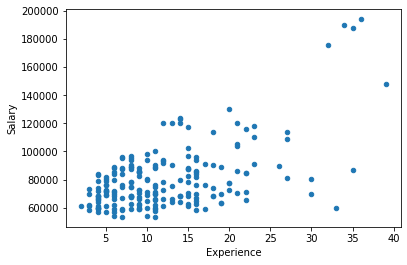

In [7]:
# plot
Employees_df.plot(kind='scatter', x='Experience', y='Salary')


In [8]:
# I shuffle the original data to have both male and female employees in train and test datasets.
Shuffled_df = Employees_df.reindex(np.random.permutation(Employees_df.index))
# Turning categorical gender values into numerical ones.
Allnum_df = pd.get_dummies(Shuffled_df)
# Scaling the salary and getting feautre and label variables
Allnum_df["Salary"] = np.log(Allnum_df["Salary"])
X = Allnum_df[['Experience', 'Gender_Female', 'Gender_Male']]
Y = Allnum_df['Salary']
Allnum_df.head(10)

,Experience,Salary,Gender_Female,Gender_Male
25,20,11.259323,1,0
22,11,11.097410,1,0
138,15,11.669929,1,0
48,11,11.218554,1,0
129,15,11.536642,1,0
113,9,11.350407,1,0
38,2,11.016988,1,0
179,4,11.333799,0,1
83,10,11.173248,1,0
161,4,11.127263,0,1


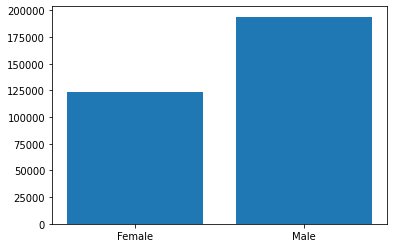

In [12]:
# The dependency between gender and salary
plt.bar(Shuffled_df['Gender'], Shuffled_df['Salary'])
plt.show()

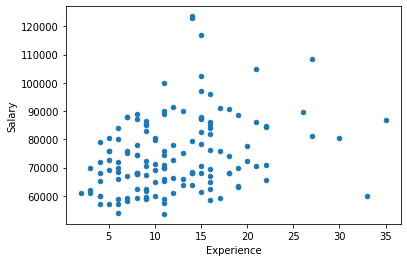

In [13]:
# The dependency between experience and salary for males and females separately
Female_df = Shuffled_df[Shuffled_df['Gender'] == 'Female']
Male_df = Shuffled_df[Shuffled_df['Gender'] == 'Male']
Female_df.plot(kind='scatter', x='Experience', y='Salary')

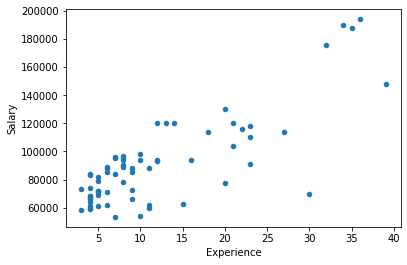

In [14]:
Male_df.plot(kind='scatter', x='Experience', y='Salary')

In [ ]:
# Splitting the shuffled data into training and test datasets
# containing 75% and 25% of the original data respectivly. 
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
x_train

,Experience,Gender_Female,Gender_Male
198,12,0,1
165,5,0,1
176,6,0,1
177,6,0,1
107,27,1,0
...,...,...,...
132,13,1,0
37,15,1,0
106,30,1,0
50,6,1,0


In [ ]:
# Creating the model
emp = LinearRegression()
params = emp.get_params()
print(params, '\n')
emp.fit(x_train, y_train)
emp.predict(x_test)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False} 



array([11.17042164, 11.25432981, 11.54874117, 11.27111144, 11.29701665,
       11.25432981, 11.12007673, 11.28789308, 11.35501962, 11.24667174,
       11.24667174, 11.24667174, 11.06973183, 11.17042164, 11.37180125,
       11.31379828, 11.25432981, 11.69977588, 11.06973183, 11.29701665,
       11.26345338, 11.25432981, 11.32145635, 11.29701665, 11.2039849 ,
       11.26345338, 11.27111144, 11.73333915, 11.27111144, 11.17042164,
       11.5151779 , 11.28023501, 11.33823798, 11.24667174, 11.39770645,
       11.28023501, 11.43892779, 11.2039849 , 11.17042164, 11.1032951 ,
       11.12007673, 11.6158677 , 11.05295019, 11.18720327, 11.54874117,
       11.23754817, 11.55639923, 11.15364   , 11.06973183, 11.22989011,
       11.25432981, 11.49839626])

In [ ]:
# The error
mean_squared_error(y_test, emp.predict(x_test))

0.04166143566034562